In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 16.5 MB/s eta 0:00:00


In [ ]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.3 MB/s eta 0:00:00


In [ ]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
%matplotlib inline

In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=60d2d686e7c1f05955cfd114e54dfbdfa851046253c41753038d2f51f8f4c992
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


# CNOT Gate

CNOT Gate inverts the target qubit if the control qubit is 1 otherwise it does nothig to the target qubit.

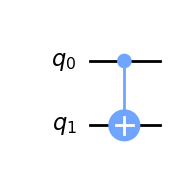

In [ ]:
circuit = QuantumCircuit(2)
circuit.cx(0, 1)
circuit.draw('mpl')

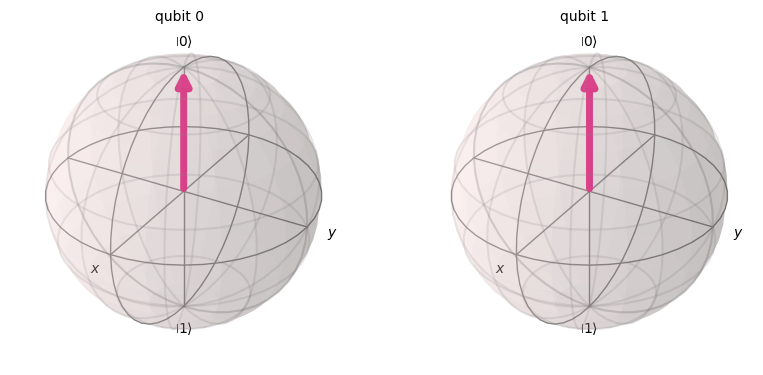

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

As, here the control qubit is zero thus it does not inverts the target qubit and we have both qubits in zero state.

Now applying x gate to first qubit to invert it's state.

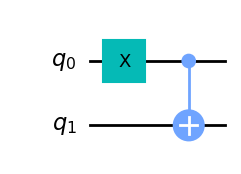

In [ ]:
circuit = QuantumCircuit(2)
circuit.x(0)
circuit.cx(0, 1)
circuit.draw('mpl')

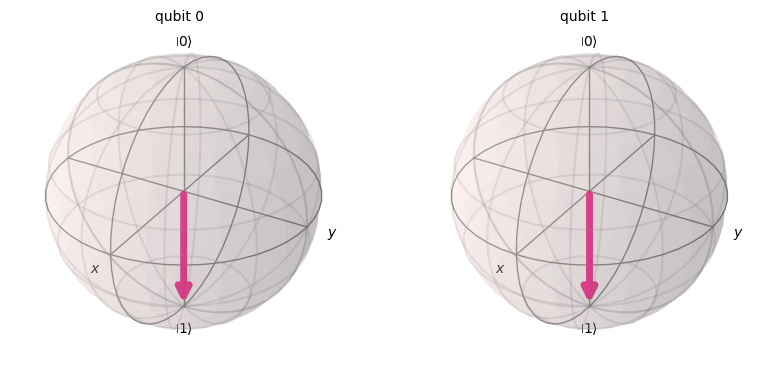

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

Thus , other qubit is inverted now from zero to one by applying CNOT Gate

Now let's see it with 3 qubits

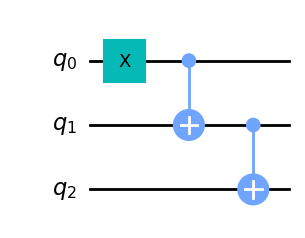

In [ ]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.draw('mpl')

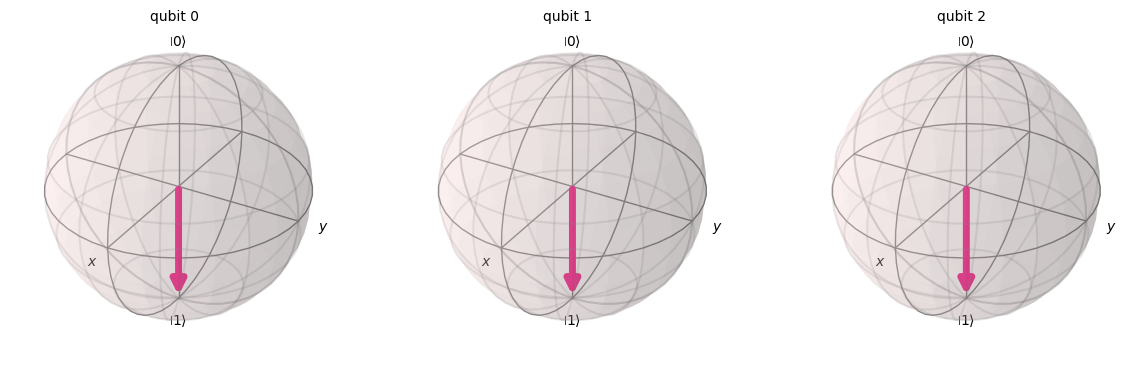

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

There is a important thing here that the sequence is import while applying CNOT Gate. Let's see example below

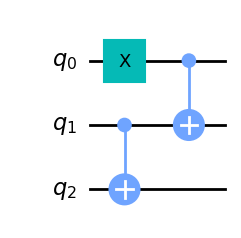

In [ ]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.cx(1, 2)
circuit.cx(0, 1)
circuit.draw('mpl')

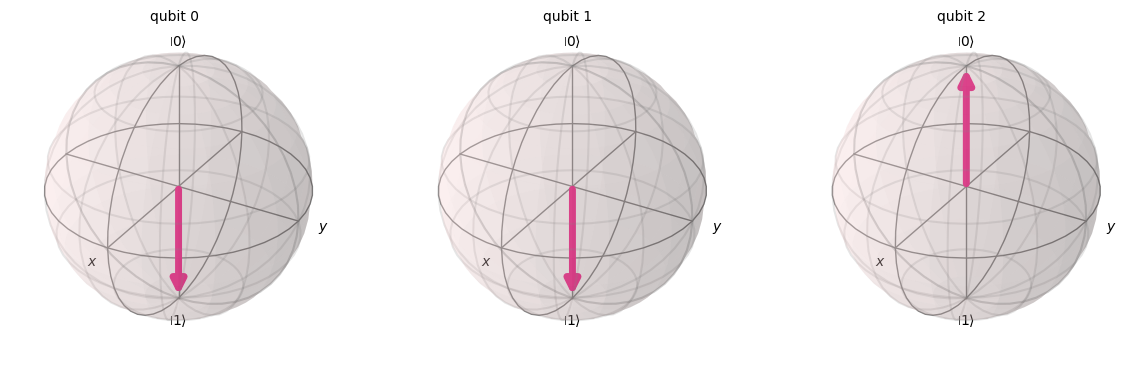

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

As, in this case the control qubit in second CNOT Gate which is second qubit is in zero state, However it was flipped by first CNOT gate afterwards, That's why the state of target qubit (3rd) flipped.

# Toffoli Gate

Toffoli gate or CCNOT Gate inverts the target qubit only if the the two control qubits are in state 1.

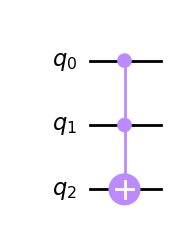

In [ ]:
circuit = QuantumCircuit(3)
circuit.ccx(0, 1, 2) # we can use both toffoli or ccx
circuit.draw('mpl')

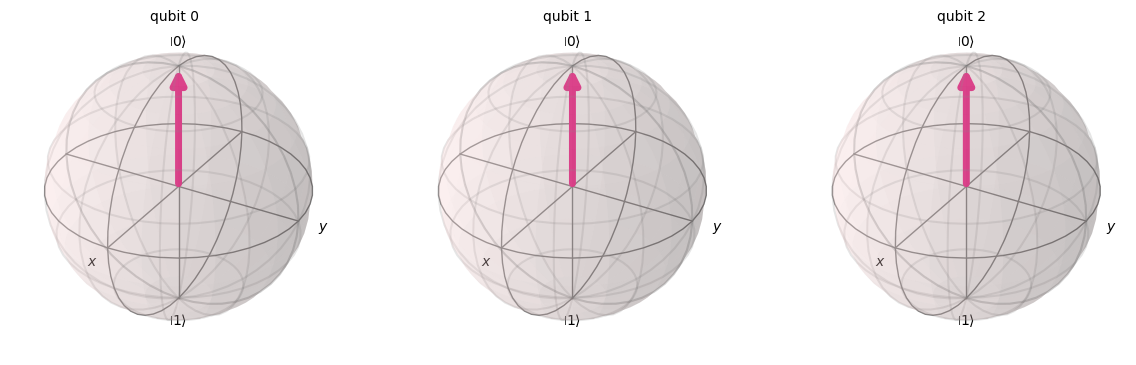

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

Now inverting the state of first qubit

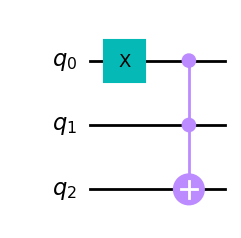

In [ ]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.ccx(0, 1, 2) # we can use both toffoli or ccx
circuit.draw('mpl')

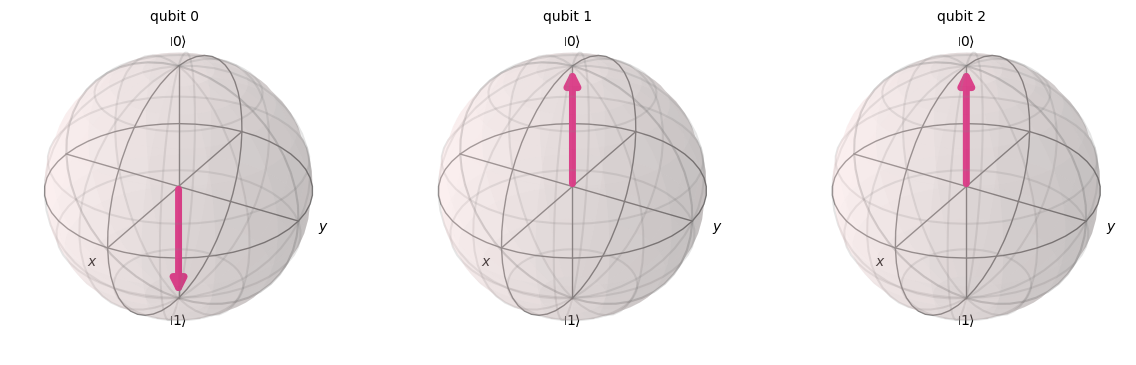

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

still not the the state of 3rd qubit is flipped as the both target qubits are not in 1 state. Let's convert flip both

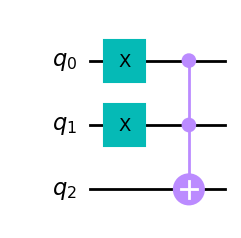

In [ ]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.x(1)
circuit.ccx(0, 1, 2) # we can use both toffoli or ccx
circuit.draw('mpl')

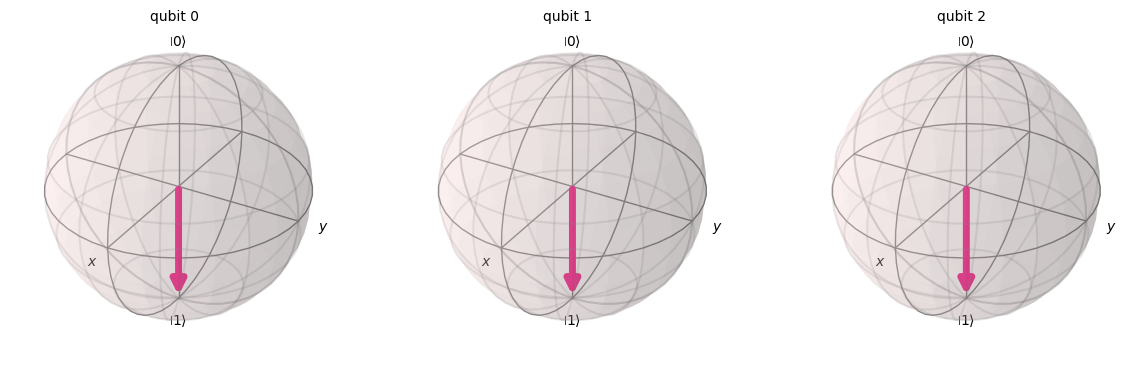

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

Now we can see clearly that the state of 3rd qubit is flipped.

Now let's see the effect of toffoli gate if the target qubit is some state other than zero or 1

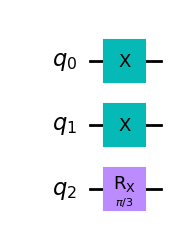

In [ ]:
from math import pi
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.x(1)
circuit.rx(pi/3, 2)
#circuit.ccx(0, 1, 2) # we can use both toffoli or ccx
circuit.draw('mpl')

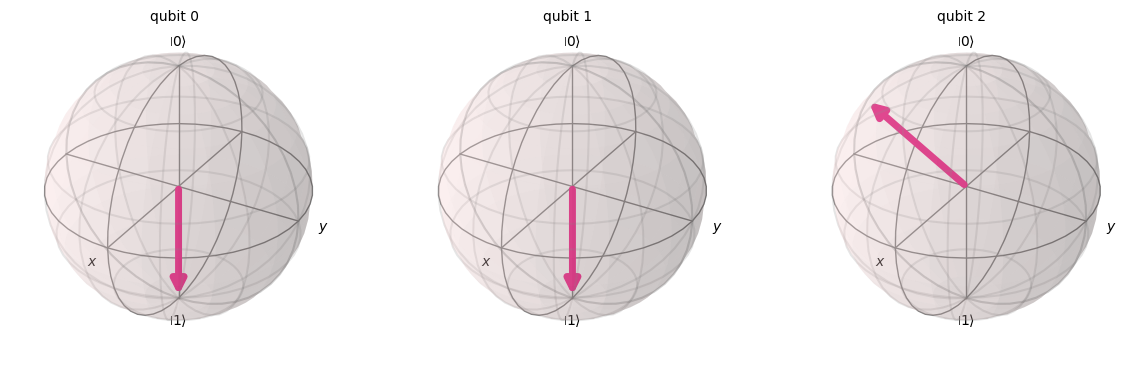

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

Now let's apply toffoli gate

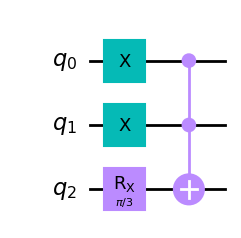

In [ ]:
from math import pi
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.x(1)
circuit.rx(pi/3, 2)
circuit.ccx(0, 1, 2) # we can use both toffoli or ccx
circuit.draw('mpl')

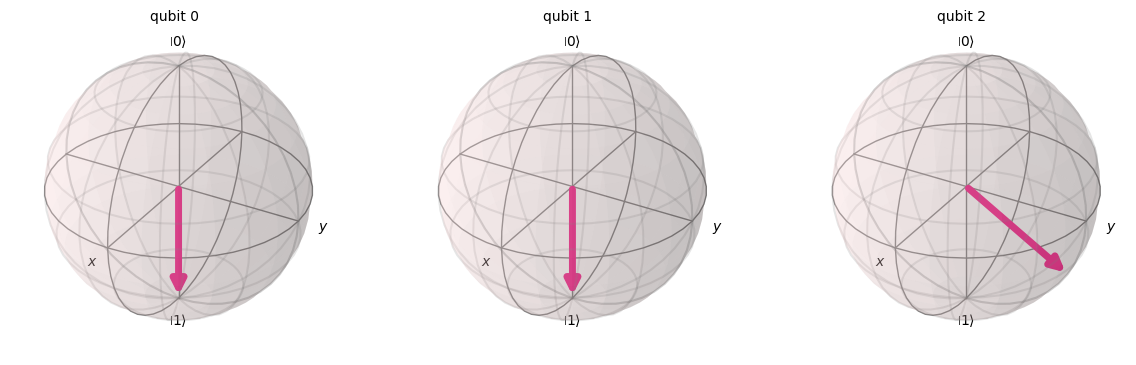

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

# Swap Gate

Swap gate just swaps the state of two qubits. Let's initialize with three qubits

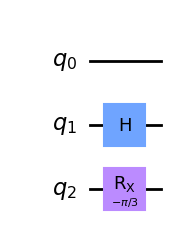

In [ ]:
circuit = QuantumCircuit(3)
circuit.h(1)
circuit.rx(-pi/3, 2)
circuit.draw('mpl')

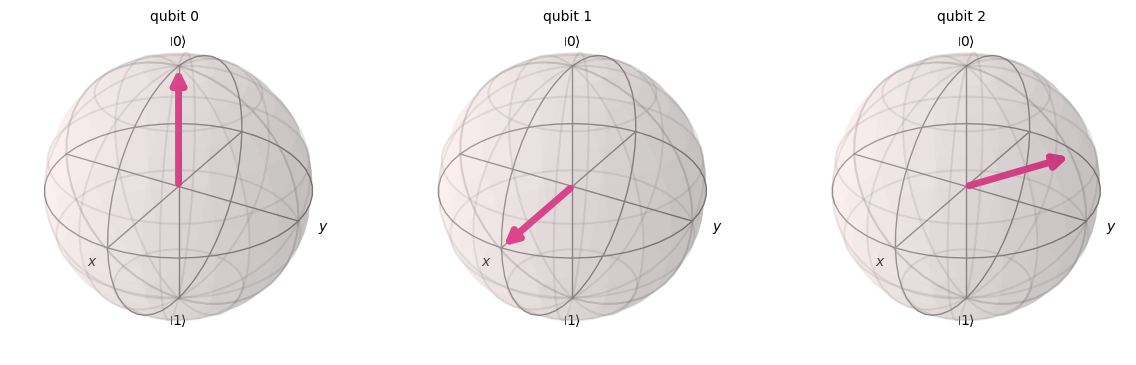

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

Now, let's apply SWAP Gate

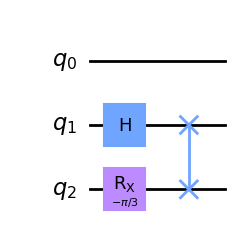

In [ ]:
circuit = QuantumCircuit(3)
circuit.h(1)
circuit.rx(-pi/3, 2)
circuit.swap(1, 2)
circuit.draw('mpl')

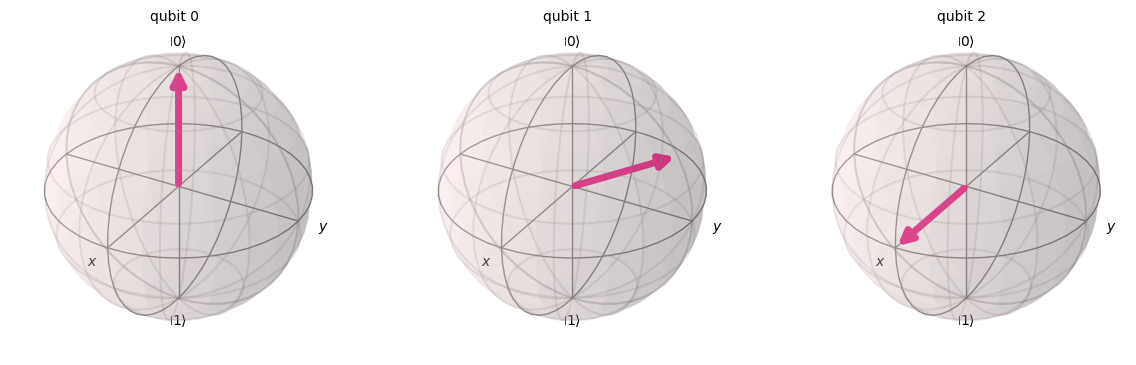

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

So, they two qubits are swaped now.

# Fredkin Gate(controlled SWAP Gate)

This gate only swap the target qubits if the controle qubit is in state 1

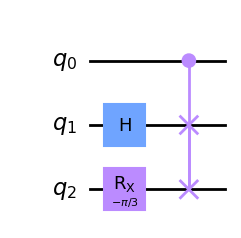

In [ ]:
circuit = QuantumCircuit(3)
circuit.h(1)
circuit.rx(-pi/3, 2)
circuit.fredkin(0, 1, 2) # we can also use cswap instead of fredkin
circuit.draw('mpl')

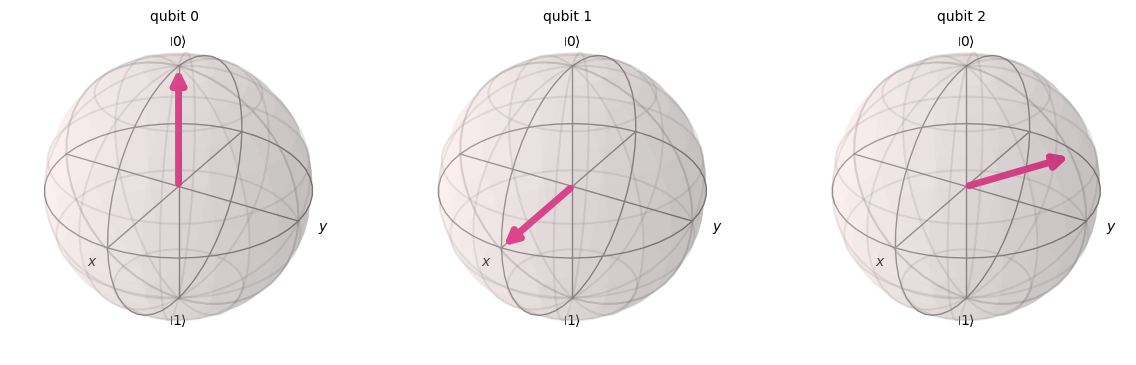

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

But, it doesn't change as the control qubit is in state 0.

Now, convert the control gate to 1.

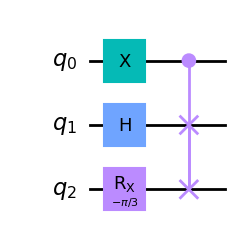

In [ ]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.h(1)
circuit.rx(-pi/3, 2)
circuit.fredkin(0, 1, 2) # we can also use cswap instead of fredkin
circuit.draw('mpl')

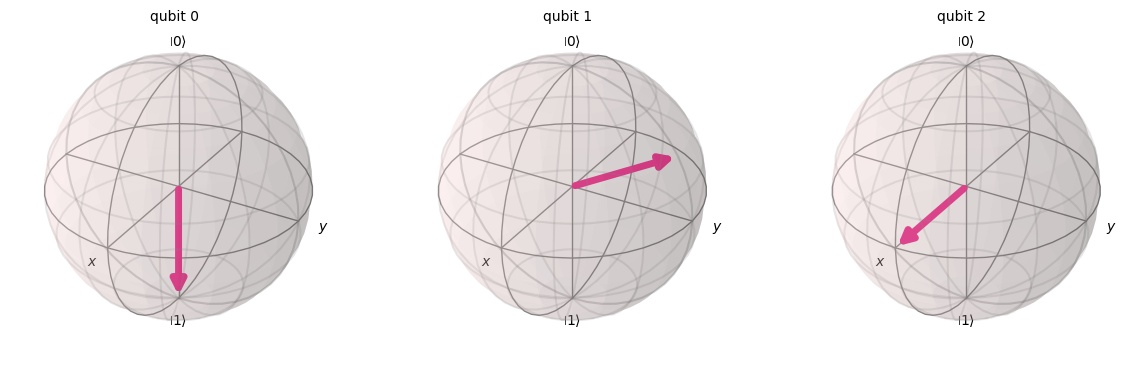

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

# Challenge


Make a two bit added quantum logic gate ciruit.

We will initiate 4 qubits two for qubits A and B and two for Sum and Carry-out. Then by using classical logic and compaing , we can make this quantum circuit.

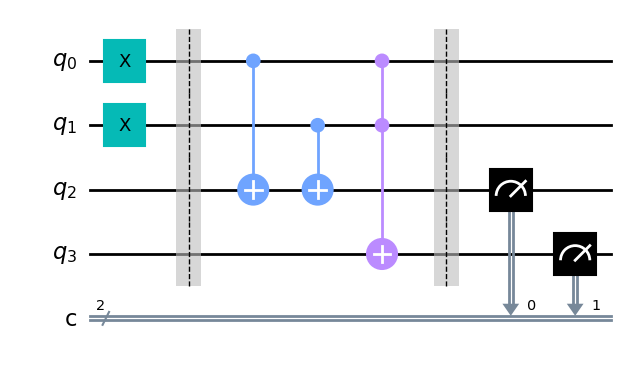

In [ ]:
circuit = QuantumCircuit(4, 2)
circuit.x(0)
circuit.x(1)
circuit.barrier()

circuit.cx(0, 2)
circuit.cx(1, 2)
circuit.ccx(0, 1, 3)

circuit.barrier()
circuit.measure(2, 0)
circuit.measure(3, 1)
circuit.draw('mpl')

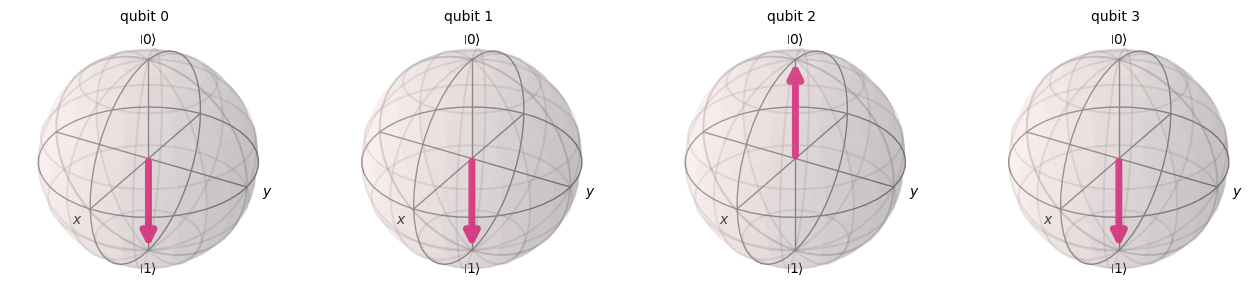

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

The End